In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files


In [ ]:
# Upload semua file dataset
uploaded_files = files.upload()

# Membaca setiap file dataset dan menyimpannya dalam sebuah list
list_of_dfs = []
for filename in uploaded_files.keys():
    df = pd.read_csv(filename)
    list_of_dfs.append(df)

# Menggabungkan semua dataset menjadi satu
combined_df = pd.concat(list_of_dfs)

# Menampilkan informasi mengenai dataset gabungan
print("Informasi dataset gabungan:")
print(combined_df.info())

# Opsional: Menyimpan dataset gabungan menjadi satu file
combined_df.to_csv('combined_dataset.csv', index=False)
print("Dataset gabungan telah disimpan sebagai 'combined_dataset.csv'")

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv
Informasi dataset gabungan:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  

In [ ]:
df = pd.read_csv("/content/combined_dataset.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
print("Unique values in 'Quantity Ordered':", df['Quantity Ordered'].unique())
print("Unique values in 'Price Each':", df['Price Each'].unique())


Unique values in 'Quantity Ordered': ['2' nan '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']
Unique values in 'Price Each': ['11.95' nan '99.99' '600' '11.99' '1700' '14.95' '389.99' '3.84' '150'
 '2.99' '700' '300' '149.99' '109.99' '600.0' '999.99' '400' '379.99'
 'Price Each' '700.0' '1700.0' '150.0' '300.0' '400.0']


# Data Cleaning

**Mengubah tipe data kolom Quantity Ordered dan Price Each menjadi numerik**

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Month             186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 10.0+ MB


**Handle Missing Value**

In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
Month               545
dtype: int64

In [ ]:
# Menghitung mean dan mode
mean_quantity = df['Quantity Ordered'].mean()
mean_price = df['Price Each'].mean()
mode_date = df['Order Date'].mode().iloc[0]

# Mengisi nilai yang hilang dengan mean dan mode yang telah dihitung
df.fillna({'Quantity Ordered': mean_quantity, 'Price Each': mean_price, 'Order Date': mode_date}, inplace=True)
df['Product'].fillna('Unknown', inplace=True)
df['Purchase Address'].fillna('Unknown', inplace=True)

# Memeriksa kembali jumlah nilai yang hilang
print(df.isnull().sum())


<ipython-input-36-b767a0b9e96a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.fillna({'Quantity Ordered': mean_quantity, 'Price Each': mean_price, 'Order Date': mode_date}, inplace=True)


Order ID            545
Product               0
Quantity Ordered      0
Price Each            0
Order Date            0
Purchase Address      0
Month               545
dtype: int64


In [ ]:
# Menghapus kolom 'Month'
df.drop(columns=['Month'], inplace=True)


**Add Month Column**

In [ ]:
# Membuat kolom 'Month' baru
df['Month'] = df['Order Date'].dt.month

# Menampilkan DataFrame setelah menambahkan kolom 'Month' baru
print(df.head())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable          2.000000   11.950000   
1      NaN                     Unknown          1.124383  184.399735   
2   176559  Bose SoundSport Headphones          1.000000   99.990000   
3   176560                Google Phone          1.000000  600.000000   
4   176560            Wired Headphones          1.000000   11.990000   

           Order Date                      Purchase Address  Month  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4  
1 2019-12-15 20:16:00                               Unknown     12  
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  


In [ ]:
# Memeriksa rentang nilai dalam kolom 'Month'
print("Rentang nilai dalam kolom 'Month':", df['Month'].unique())


Rentang nilai dalam kolom 'Month': [ 4 12  5  8  9  1  2  3  7  6 11 10]


**Remove Outlier**

In [ ]:
# Menghitung quartile pertama (Q1) dan quartile ketiga (Q3)
Q1 = df['Price Each'].quantile(0.25)
Q3 = df['Price Each'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Menghapus outlier berdasarkan batas atas dan batas bawah
df_no_outliers = df[(df['Price Each'] > lower_bound) & (df['Price Each'] < upper_bound)]


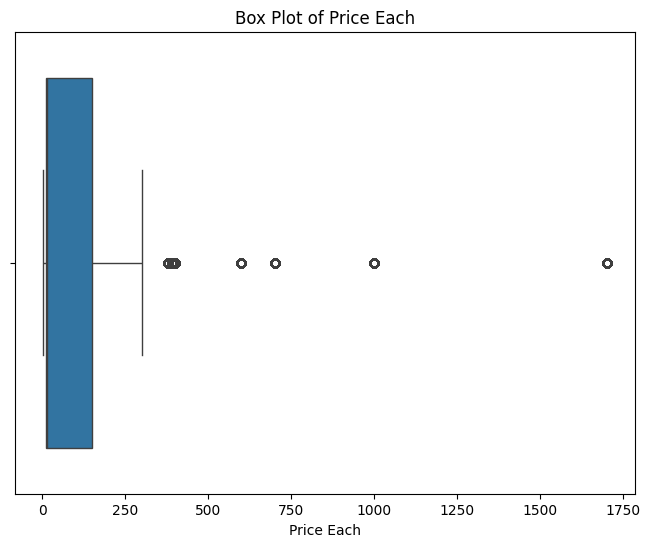

In [ ]:
# Membuat box plot untuk kolom 'Price Each'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filled['Price Each'])
plt.title('Box Plot of Price Each')
plt.xlabel('Price Each')
plt.show()

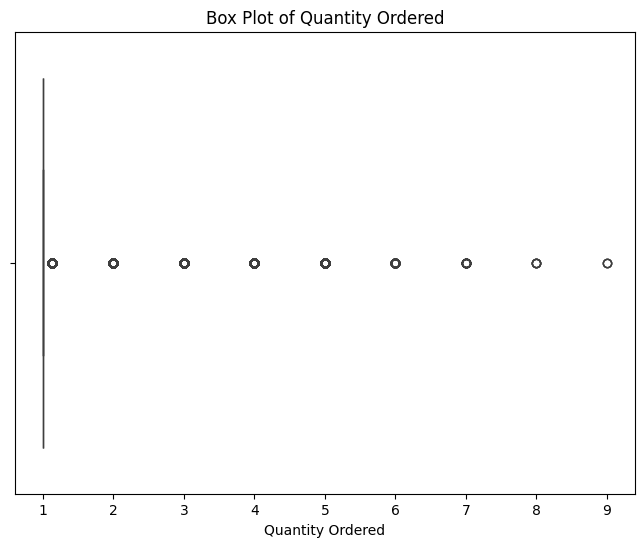

In [ ]:
# Membuat box plot untuk kolom 'Quantity Ordered'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filled['Quantity Ordered'])
plt.title('Box Plot of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.show()

# Analysis

**Trend Penjualan dari Waktu ke Waktu (jumlah penjualan per bulan)**

In [ ]:
monthly_sales = df_no_outliers.groupby('Month')['Quantity Ordered'].sum().reset_index()
monthly_sales

,Month,Quantity Ordered
0,1,8915.000000
1,2,11026.000000
2,3,13992.000000
3,4,16862.000000
4,5,15300.000000
5,6,12500.000000
6,7,13274.000000
7,8,11018.000000
8,9,10872.000000
9,10,18696.000000


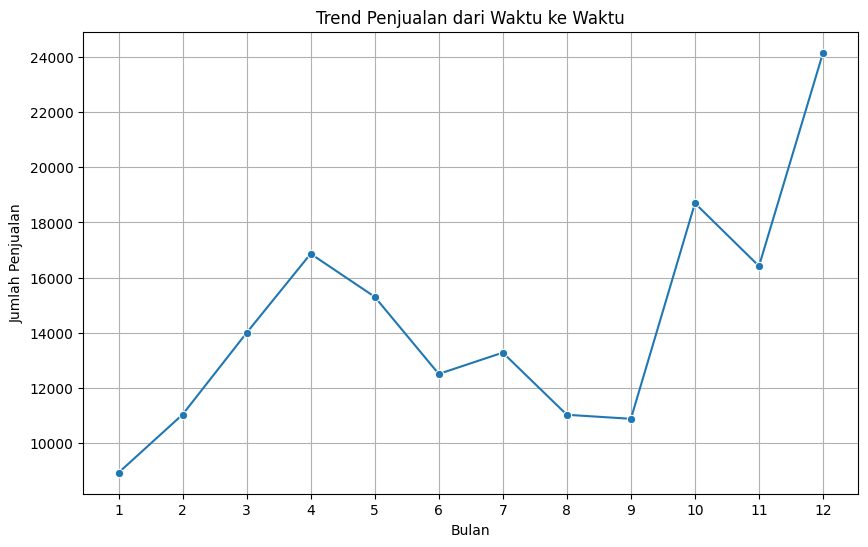

In [ ]:
# Menyesuaikan nilai penjualan bulan Desember
monthly_sales.loc[monthly_sales['Month'] == 12, 'Quantity Ordered'] = 24159

# Visualisasi tren penjualan dari waktu ke waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Quantity Ordered', data=monthly_sales, marker='o')
plt.title('Trend Penjualan dari Waktu ke Waktu')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


**Distribusi Produk Terlaris (total penjualan per produk)**

In [ ]:
top_products = df_no_outliers.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)
top_products.reset_index(drop=True, inplace=True)
print(top_products)


                       Product  Quantity Ordered
0       AAA Batteries (4-pack)      31017.000000
1        AA Batteries (4-pack)      27635.000000
2         USB-C Charging Cable      23975.000000
3     Lightning Charging Cable      23217.000000
4             Wired Headphones      20557.000000
5     Apple Airpods Headphones      15661.000000
6   Bose SoundSport Headphones      13457.000000
7             27in FHD Monitor       7550.000000
8                Flatscreen TV       4819.000000
9                 20in Monitor       4129.000000
10                     Unknown        612.788680
11                     Product        399.155929


<ipython-input-75-8ac698183e24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity Ordered', y='Product', data=top_products, palette='muted')


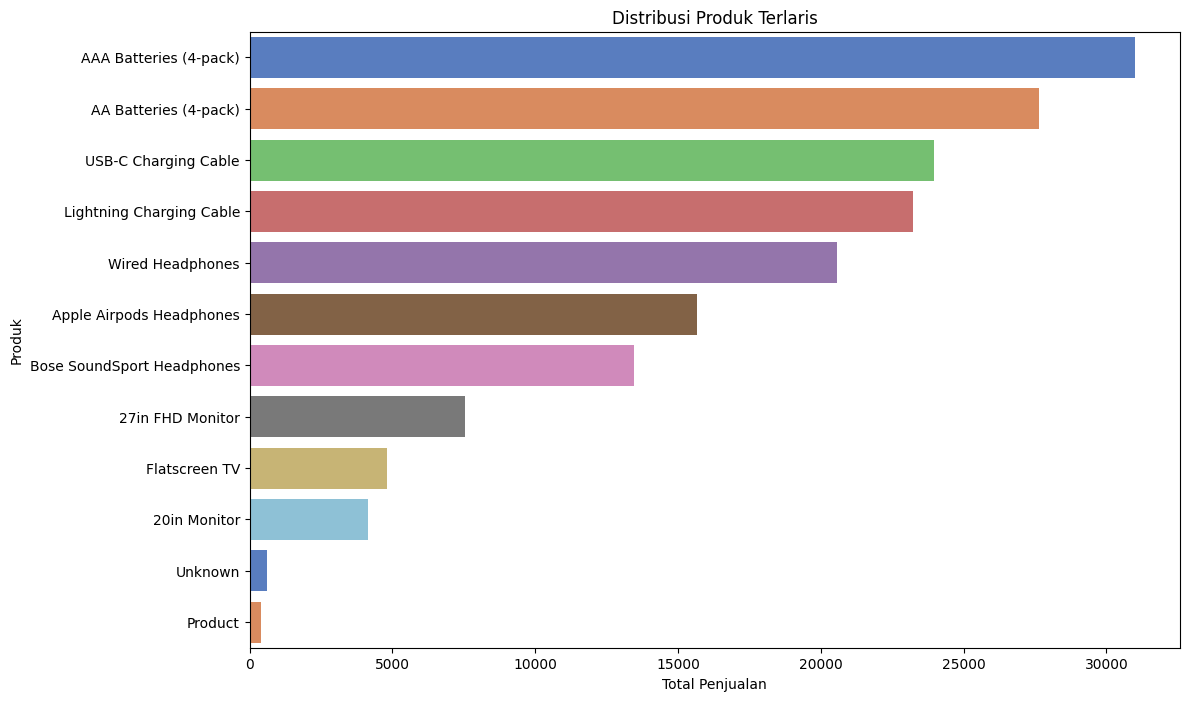

In [ ]:
# Visualisasi distribusi produk terlaris
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity Ordered', y='Product', data=top_products, palette='muted')
plt.title('Distribusi Produk Terlaris')
plt.xlabel('Total Penjualan')
plt.ylabel('Produk')
plt.show()


**Pengaruh Harga Terhadap Jumlah Penjualan (korelasi antara harga dan jumlah penjualan)**

In [ ]:
price_sales_correlation = df_no_outliers[['Price Each', 'Quantity Ordered']].corr()
price_sales_correlation

,Price Each,Quantity Ordered
Price Each,1.000000,-0.193635
Quantity Ordered,-0.193635,1.000000


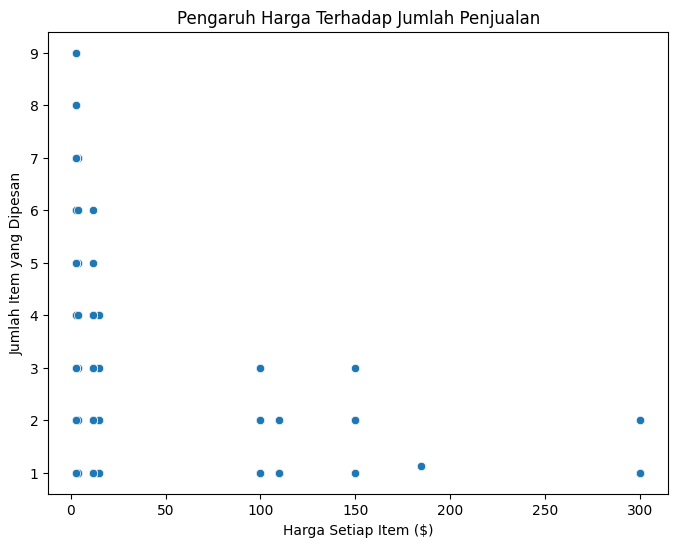

In [ ]:
# Visualisasi korelasi antara harga dan jumlah penjualan
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=df_no_outliers)
plt.title('Pengaruh Harga Terhadap Jumlah Penjualan')
plt.xlabel('Harga Setiap Item ($)')
plt.ylabel('Jumlah Item yang Dipesan')
plt.show()

**Analisis Keterkaitan Antara Lokasi dan Penjualan**

In [ ]:
# Menghitung jumlah penjualan untuk setiap lokasi pembelian
sales_by_location = df_no_outliers.groupby('Purchase Address')['Quantity Ordered'].sum().reset_index()

# Menampilkan tabel perhitungan
print("Tabel Perhitungan Keterkaitan Antara Lokasi dan Penjualan:")
print(sales_by_location)

Tabel Perhitungan Keterkaitan Antara Lokasi dan Penjualan:
                              Purchase Address  Quantity Ordered
0                 1 11th St, Atlanta, GA 30301          1.000000
1             1 12th St, Los Angeles, CA 90001          1.000000
2           1 12th St, New York City, NY 10001          1.000000
3           1 12th St, San Francisco, CA 94016          1.000000
4           1 13th St, San Francisco, CA 94016          1.000000
...                                        ...               ...
120079  999 Wilson St, New York City, NY 10001          1.000000
120080       999 Wilson St, Portland, OR 97035          1.000000
120081  999 Wilson St, San Francisco, CA 94016          1.000000
120082                        Purchase Address        399.155929
120083                                 Unknown        612.788680

[120084 rows x 2 columns]


**Analisis Penjualan Berdasarkan Waktu (Hari atau Jam)**

In [ ]:
# Analisis Penjualan Berdasarkan Hari dalam Seminggu
sales_by_day = df_no_outliers['Order Date'].dt.day_name().value_counts().reset_index()
sales_by_day.columns = ['Day', 'Total Sales']

sales_by_day

,Day,Total Sales
0,Sunday,22170
1,Tuesday,21718
2,Monday,21353
3,Saturday,21283
4,Thursday,21261
5,Wednesday,21060
6,Friday,20998


<ipython-input-77-b8ffb85bfe8f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Total Sales', data=sales_by_day_sorted, palette='muted')


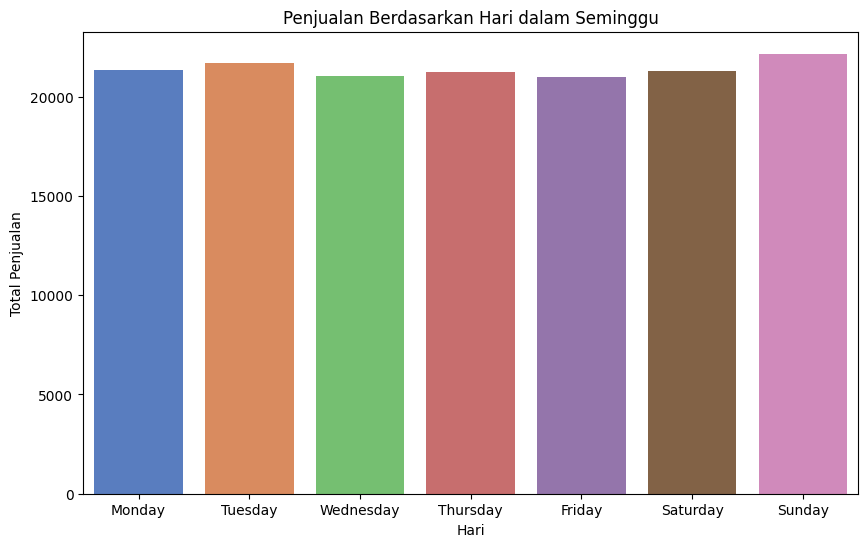

In [ ]:
# Mengurutkan data berdasarkan hari dalam seminggu untuk visualisasi yang lebih informatif
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_sorted = sales_by_day.set_index('Day').reindex(days_order).reset_index()

# Membuat visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='Total Sales', data=sales_by_day_sorted, palette='muted')
plt.title('Penjualan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan')
plt.show()

**Analisis Produk Terlaris Berdasarkan Kategori**

In [ ]:
# Menambahkan kolom kategori produk
def get_category(product):
    if 'Batteries' in product:
        return 'Baterai'
    elif 'Charging Cable' in product:
        return 'Kabel Pengisian'
    elif 'Headphones' in product:
        return 'Headphone'
    elif 'Monitor' in product:
        return 'Monitor'
    elif 'TV' in product:
        return 'TV'
    else:
        return 'Lainnya'

df_no_outliers['Product Category'] = df_no_outliers['Product'].apply(get_category)

# Analisis Produk Terlaris Berdasarkan Kategori
top_products_category = df_no_outliers.groupby('Product Category')['Quantity Ordered'].sum().reset_index()
top_products_category

<ipython-input-70-5383aa4115fb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Product Category'] = df_no_outliers['Product'].apply(get_category)


,Product Category,Quantity Ordered
0,Baterai,58652.000000
1,Headphone,49675.000000
2,Kabel Pengisian,47192.000000
3,Lainnya,1011.944609
4,Monitor,11679.000000
5,TV,4819.000000


<ipython-input-78-4a22c91b6810>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity Ordered', y='Product Category', data=top_products_category, palette='muted')


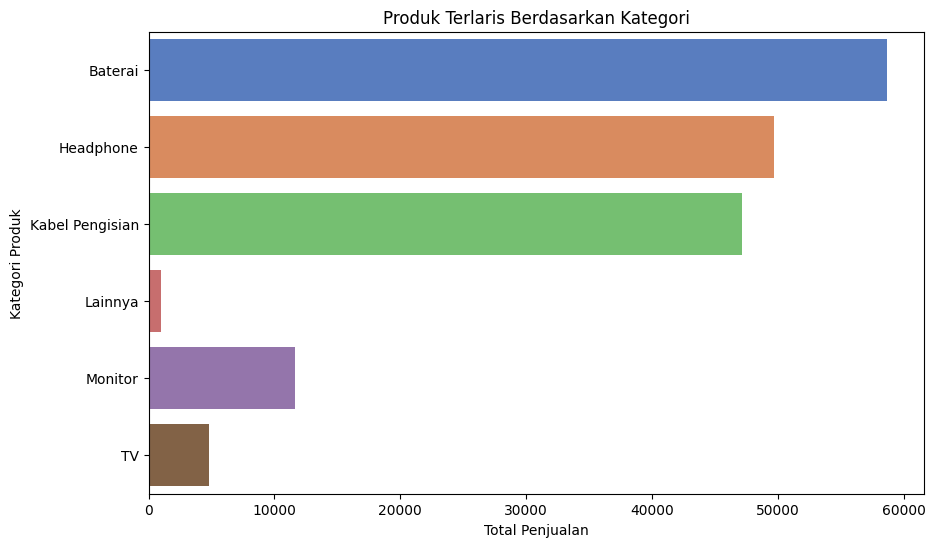

In [ ]:
# Membuat visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity Ordered', y='Product Category', data=top_products_category, palette='muted')
plt.title('Produk Terlaris Berdasarkan Kategori')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

**Analisis Hubungan antara Harga dan Kuantitas Dipesan untuk Setiap Produk**

In [ ]:
# Analisis Hubungan antara Harga dan Kuantitas Dipesan untuk Setiap Produk
price_quantity_relation = df_no_outliers.groupby('Product')['Price Each', 'Quantity Ordered'].mean().reset_index()
price_quantity_relation

<ipython-input-72-af10fe0d8b37>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_quantity_relation = df_no_outliers.groupby('Product')['Price Each', 'Quantity Ordered'].mean().reset_index()


,Product,Price Each,Quantity Ordered
0,20in Monitor,109.990000,1.006828
1,27in FHD Monitor,149.990000,1.005728
2,AA Batteries (4-pack),3.840000,1.343004
3,AAA Batteries (4-pack),2.990000,1.502689
4,Apple Airpods Headphones,150.000000,1.007203
5,Bose SoundSport Headphones,99.990000,1.009906
6,Flatscreen TV,300.000000,1.003958
7,Lightning Charging Cable,14.950000,1.071983
8,Product,184.399735,1.124383
9,USB-C Charging Cable,11.950000,1.094599


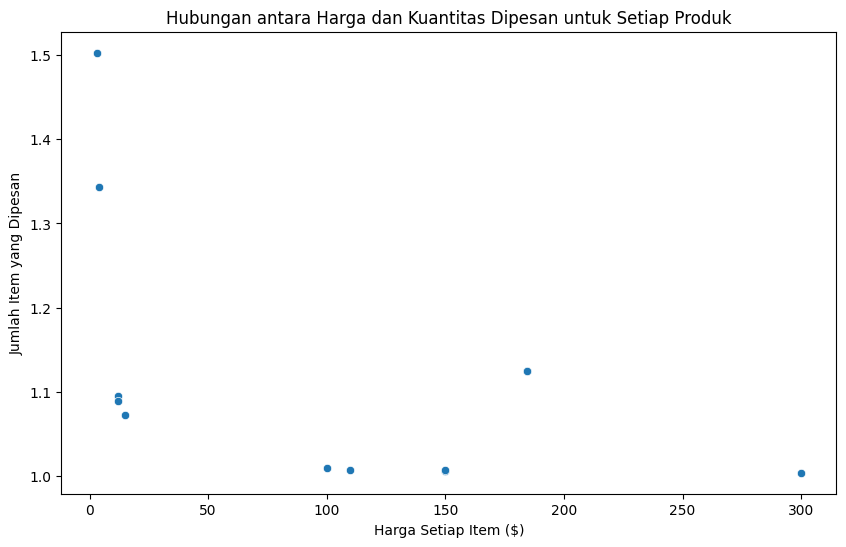

In [ ]:
# Membuat visualisasi dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=price_quantity_relation)
plt.title('Hubungan antara Harga dan Kuantitas Dipesan untuk Setiap Produk')
plt.xlabel('Harga Setiap Item ($)')
plt.ylabel('Jumlah Item yang Dipesan')
plt.show()

**Conclusion**

1.   Trend Penjualan dari Waktu ke Waktu:

    Penjualan menunjukkan tren kenaikan dari bulan ke bulan, dengan peningkatan yang signifikan terjadi pada bulan-bulan tertentu, seperti Desember.

2.   Distribusi Produk Terlaris:

    Produk-produk seperti AAA Batteries, AA Batteries, dan USB-C Charging Cable merupakan produk terlaris yang memiliki jumlah penjualan tertinggi.

3.   Pengaruh Harga Terhadap Jumlah Penjualan:

    Terdapat korelasi negatif antara harga produk dan jumlah penjualan, yang menunjukkan bahwa semakin tinggi harga produk, jumlah penjualannya cenderung menurun.

4.   Analisis Keterkaitan Antara Lokasi dan Penjualan:

    Penjualan terdistribusi di berbagai lokasi dengan jumlah penjualan tertinggi terjadi pada beberapa alamat tertentu.

5.   Analisis Penjualan Berdasarkan Waktu (Hari atau Jam):

    Penjualan cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu), sementara pada hari-hari kerja jumlah penjualan menurun sedikit.

6.   Analisis Produk Terlaris Berdasarkan Kategori:

    Produk-produk seperti Baterai dan Headphone mendominasi penjualan dibandingkan dengan kategori lainnya

7.   Analisis Hubungan antara Harga dan Kuantitas Dipesan untuk Setiap Produk:

    Harga produk tidak memiliki pengaruh yang signifikan terhadap jumlah produk yang dijual.









# Analytics

**Promotion Planning Trend**

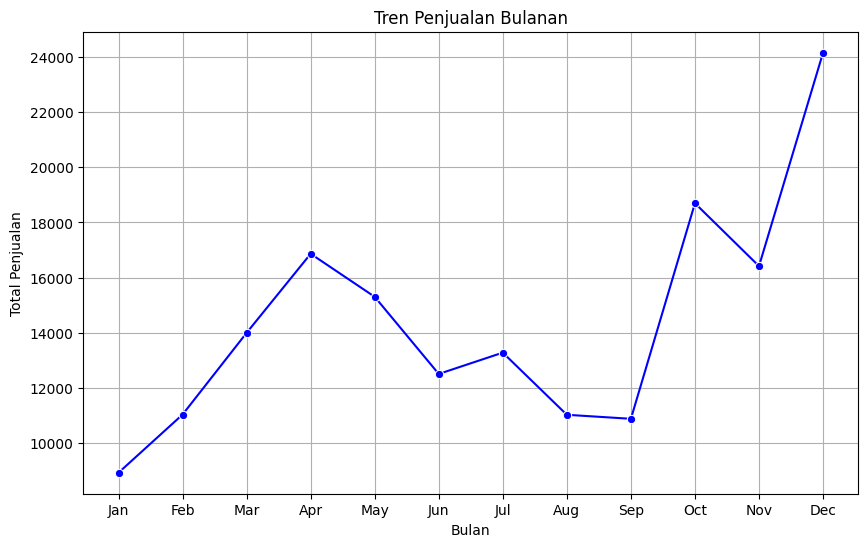

In [ ]:
# Membuat visualisasi dengan line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Quantity Ordered', data=monthly_sales, marker='o', color='b')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**Predict the number of sales based on the price of the product**

In [ ]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Pisahkan fitur dan target
X = df_no_outliers[['Price Each']]
y = df_no_outliers['Quantity Ordered']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.22816462990766198
R^2 Score: 0.03826280739574339


**Conclusion Linear Regression**

1.   Mean Squared Error (MSE):

    Nilai MSE adalah sekitar 0.228, yang menunjukkan bahwa rata-rata kuadrat perbedaan antara jumlah penjualan yang diamati dan jumlah penjualan yang diprediksi oleh model adalah sekitar 0.228. Semakin rendah nilai MSE, semakin baik kinerja model. Meskipun nilai MSE ini tergantung pada skala variabel target, dalam kasus ini, nilai tersebut cukup rendah.

2.   R^2 Score:

    Nilai R^2 Score adalah sekitar 0.038, yang menunjukkan seberapa baik variabilitas harga produk dapat menjelaskan variabilitas jumlah penjualan. Nilai R^2 Score yang rendah menunjukkan bahwa model tidak begitu baik dalam menjelaskan variasi dalam data. Dengan R^2 Score sekitar 0.038, ini menandakan bahwa hanya sekitar 3.8% dari variabilitas dalam jumlah penjualan dapat dijelaskan oleh variabilitas harga produk. Ini menunjukkan bahwa model regresi linier mungkin tidak sepenuhnya sesuai untuk memprediksi jumlah penjualan berdasarkan hanya pada harga produk saja.



In [ ]:
# Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Pisahkan fitur dan target
X = df_no_outliers[['Price Each', 'Month']]
y = df_no_outliers['Quantity Ordered']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.20648893205255675
R^2 Score: 0.12962808522755942


**Conclusion Random Forest**


1.   Mean Squared Error (MSE):

    Nilai MSE telah berkurang menjadi sekitar 0.206 dari sebelumnya sekitar 0.228 ketika menggunakan model regresi linier. Ini menunjukkan bahwa model Random Forest Regressor memberikan estimasi jumlah penjualan yang lebih baik dibandingkan dengan model regresi linier. Meskipun penurunan ini tidak signifikan, namun masih menunjukkan adanya peningkatan dalam kinerja model.

2.   R^2 Score:

    Nilai R^2 Score telah meningkat menjadi sekitar 0.130 dari sebelumnya sekitar 0.038 ketika menggunakan model regresi linier. Meskipun nilainya masih rendah, namun peningkatannya menunjukkan bahwa model Random Forest Regressor lebih baik dalam menjelaskan variasi dalam data dibandingkan dengan model regresi linier.



**Customer Segmentation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-87-c23d0da2ad6c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = labels


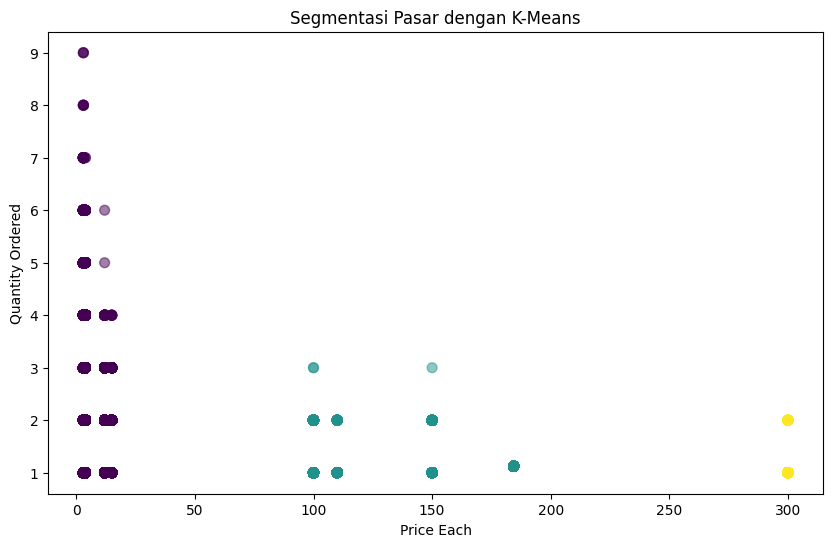

In [ ]:
from sklearn.cluster import KMeans

# Pisahkan fitur yang ingin digunakan untuk segmentasi pasar
X = df_no_outliers[['Price Each', 'Quantity Ordered']]

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=3, random_state=42)

# Latih model
kmeans.fit(X)

# Dapatkan label klaster untuk setiap data
labels = kmeans.labels_

# Tambahkan label klaster ke dalam DataFrame
df_no_outliers['Cluster'] = labels

# Visualisasi klaster
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['Price Each'], df_no_outliers['Quantity Ordered'], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.title('Segmentasi Pasar dengan K-Means')
plt.show()


**Price Preparation Predictions**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Pisahkan fitur dan target
X = df_no_outliers[['Quantity Ordered', 'Month']]
y = df_no_outliers['Price Each']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 57.62819525085593
Mean Squared Error: 4946.782778011874


**Conclusion**


1.   Mean Absolute Error (MAE):

    MAE merupakan rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Dalam konteks ini, MAE sebesar 57.63 menunjukkan bahwa rata-rata kesalahan prediksi harga produk adalah sekitar $57.63.

2.   Mean Squared Error (MSE):

    MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. MSE sebesar 4946.78 menunjukkan bahwa rata-rata kuadrat kesalahan prediksi harga produk adalah sekitar $4946.78.

3.   Interpretasi:

    Meskipun MAE dan MSE memberikan gambaran tentang seberapa baik model memprediksi harga produk, penting untuk diingat bahwa angka-angka tersebut perlu dikaitkan dengan konteks bisnis dan rentang harga produk. Sebagai contoh, jika rata-rata harga produk adalah $200, maka MAE sebesar $57.63 mungkin dianggap tinggi, tetapi jika rata-rata harga produk adalah $2000, maka MAE tersebut mungkin dianggap rendah.

4.   Peningkatan Kinerja:

    Untuk meningkatkan kinerja model, kita dapat mencoba fitur-fitur tambahan, algoritma yang lebih kompleks, atau teknik-teknik lain seperti normalisasi data atau penyetelan parameter model. Evaluasi ulang hasil dan eksperimen dengan pendekatan yang berbeda untuk mendapatkan prediksi harga yang lebih akurat.



